# Finding Lane Lines
[](https://github.com/ndrplz/self-driving-car)

## 1) Import Packages

In [1]:
# import some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## 2) Read in Images

type:  <class 'numpy.ndarray'>
shape:  (540, 960, 3)
data type:  uint8


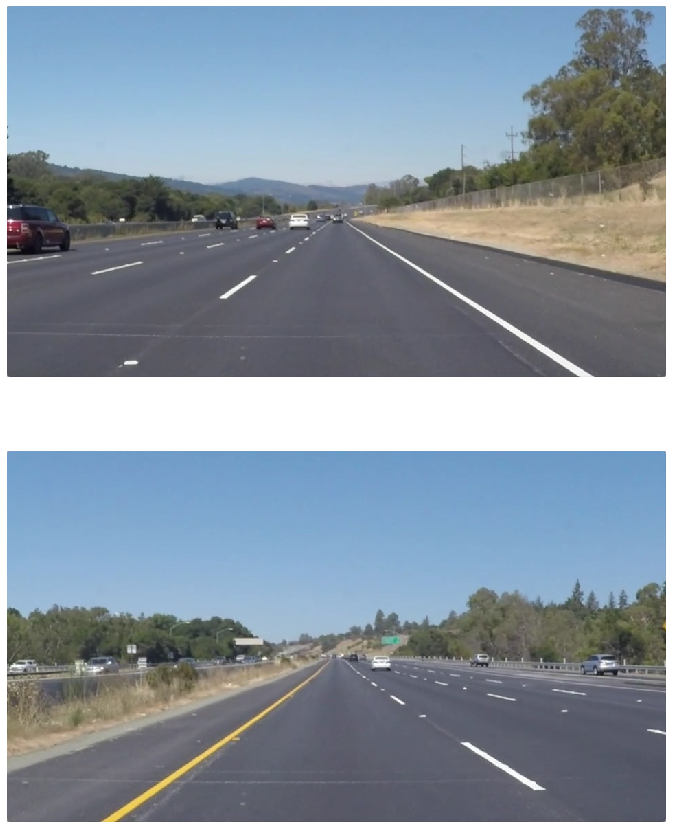

In [2]:
# read in images
img1 = cv2.imread('solidWhiteRight.jpg')
img2 = cv2.imread('solidYellowLeft.jpg')

# print out some stats and plot
print('type: ', type(img1))
print('shape: ', img1.shape)
print('data type: ', img1.dtype)

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 3) Ideas for Lane Detection Pipeline

**Some OpenCV functions and tutorials that might be useful for this project are:**

`cv2.inRange()` for color selection  

`cv2.fillPoly()` for regions selection  

`cv2.line()` to draw lines on an image given endpoints  

`cv2.addWeighted()` to coadd / overlay two images

`cv2.cvtColor()` to grayscale or change color

`cv2.imwrite()` to output images to file  

`cv2.bitwise_and()` to apply a mask to an image

`cv2.Canny()` Canny function

`cv2.GaussianBlur()` Blurring to reduce noise

`cv2.Sobel()` Sobel function

`cv2.hough()` Hough function

...

https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html
- cv2.canny(), cv2.houghLinesP()

<br>

NOTE : Using these functions is not mandatory.

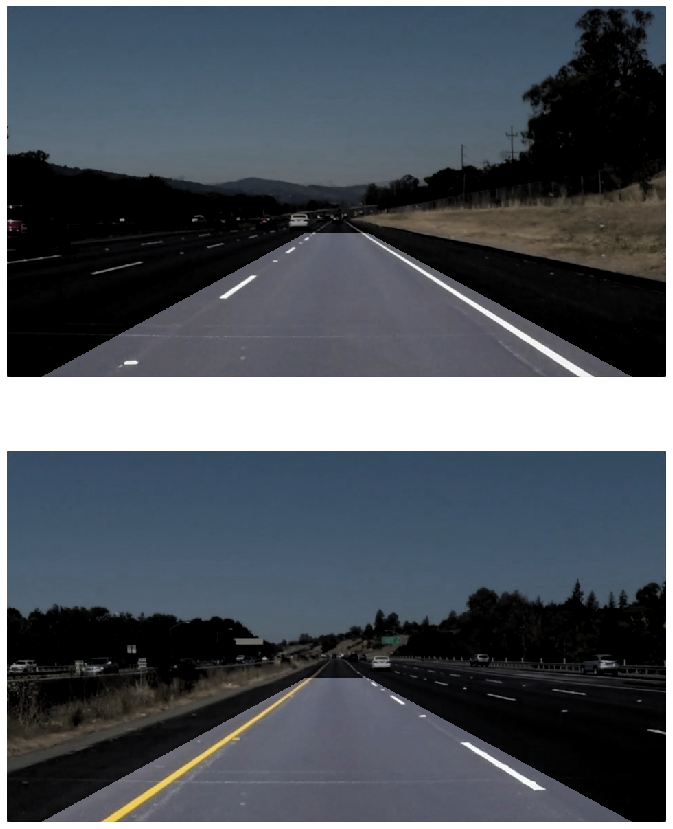

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.figure(figsize=(15,15))

listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg']

for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    height, width = img.shape[:2]
    vertices = np.array([[(50, height),
                          (width/2-45, height/2+60), 
                          (width/2+45, height/2+60), 
                          (width-50,height)]], 
                        dtype='int')
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)
    
    mask = np.zeros(img.shape[:2])
    cv2.fillPoly(mask, vertices, 255)
    
    inv_mask = cv2.bitwise_not(mask.astype('uint8'))
    v = cv2.addWeighted(v, 1.0, inv_mask, -0.4, 0.0)
    
    roi = cv2.merge([h,s,v])
    roi = cv2.cvtColor(roi, cv2.COLOR_HSV2RGB)

    plt.subplot(2,1,i+1)
    plt.imshow(roi)
    plt.axis('off')

plt.show()

## 4) Write your own codes for Lane Detection

In [4]:
import numpy as np
import cv2

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    
    return cv2.bitwise_and(img, mask)

In [5]:
###캐니엣지와 허프변환 이용
#####과제

def canny(img,low,high):
    return cv2.Canny(img,low,high)

def blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)


def full_pipeline(img):
    height, width = img.shape[:2]
    
    vertices = np.array([[(50, height),
                          (width/2-45, height/2+60), 
                          (width/2+45, height/2+60), 
                          (width-50,height)]], dtype='int')

    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_blur=blur(img_gray,3)
    img_canny=canny(img_blur,50,150)
    img_bitwise=region_of_interest(img_canny,vertices)
    lines=cv2.HoughLinesP(img_bitwise,1,np.pi/180,10,1,10)
    print(lines)
    for i in range(len(lines)):
        for x1,y1,x2,y2 in lines[i]:
            result=cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3)
    
    return result

In [6]:
listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg']

for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    
    result = full_pipeline(img)
    cv2.imshow('lane detection', result)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

[[[585 371 596 378]]

 [[790 499 821 518]]

 [[763 493 832 538]]

 [[653 414 709 448]]

 [[632 407 727 469]]

 [[549 352 589 378]]

 [[604 388 618 397]]

 [[554 352 586 371]]

 [[318 425 363 394]]

 [[310 423 328 411]]

 [[617 397 630 405]]

 [[743 469 767 485]]

 [[597 378 613 388]]

 [[732 473 765 494]]

 [[521 331 545 347]]

 [[612 388 629 398]]

 [[515 330 537 345]]

 [[838 529 852 537]]

 [[639 405 651 412]]

 [[708 448 730 461]]

 [[772 488 788 497]]]
[[[345 398 374 378]]

 [[356 397 445 330]]

 [[251 463 299 429]]

 [[389 368 439 330]]

 [[770 483 781 490]]

 [[178 524 240 480]]

 [[289 445 326 419]]

 [[730 459 762 479]]

 [[668 429 689 443]]

 [[733 470 748 480]]

 [[326 418 338 410]]

 [[155 527 185 507]]

 [[563 356 574 363]]

 [[216 486 236 473]]

 [[261 465 275 455]]

 [[698 440 723 455]]

 [[317 418 343 399]]

 [[767 493 784 493]]

 [[241 479 253 471]]

 [[697 447 710 456]]

 [[676 427 686 433]]

 [[715 459 726 466]]]
